# Examining FEM and FRM PM2.5 sensors at the Rubidoux Station
### ENE 428 Spring 2024 
### Authors: Vidya Iyer, Caleb Schimke, Brian Schlaff, Sophia Steck

## Exploratory Data Analysis

In [2]:
#Import Packages
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
#Import Data
T640 = pd.read_csv('/Users/brianschlaff/Downloads/T640 FEM PM25 data.csv')
GRIMM = pd.read_csv('/Users/brianschlaff/Downloads/GRIMM PM2.5 FEM data.csv')

In [4]:
#Convert to Datetime
GRIMM['Time'] = pd.to_datetime(GRIMM['Time'],format='%m/%d/%y %H:%M')
T640['Date (LST)'] = pd.to_datetime(T640['Date (LST)'],format='%Y/%m/%d %H:%M')

In [5]:
GRIMM

,Time,PM2.5 (ug/m3)
0,2019-12-18 17:00:00,NaN
1,2019-12-18 18:00:00,18.843333
2,2019-12-18 19:00:00,21.748333
3,2019-12-18 20:00:00,21.813333
4,2019-12-18 21:00:00,24.318333
...,...,...
33442,2023-10-12 03:00:00,21.265000
33443,2023-10-12 04:00:00,21.816667
33444,2023-10-12 05:00:00,19.616667
33445,2023-10-12 06:00:00,20.966667


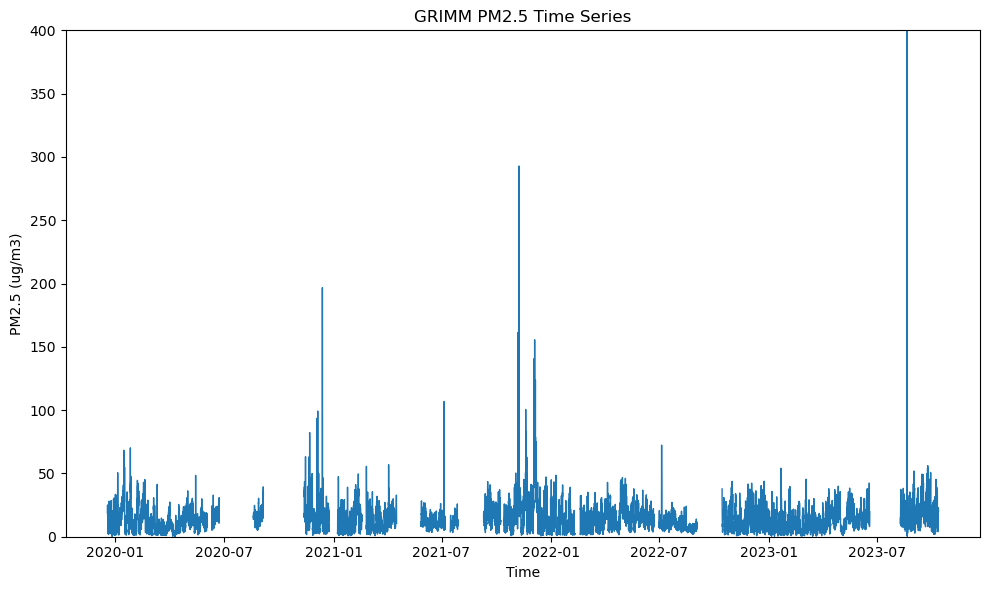

In [6]:
# Plot the T640 timeseries
plt.figure(figsize=(10, 6))
plt.plot(GRIMM['Time'], GRIMM['PM2.5 (ug/m3)'],lw=1)
plt.title('GRIMM PM2.5 Time Series')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.ylim(0, 400)
#plt.grid(True)
plt.tight_layout()
plt.show()

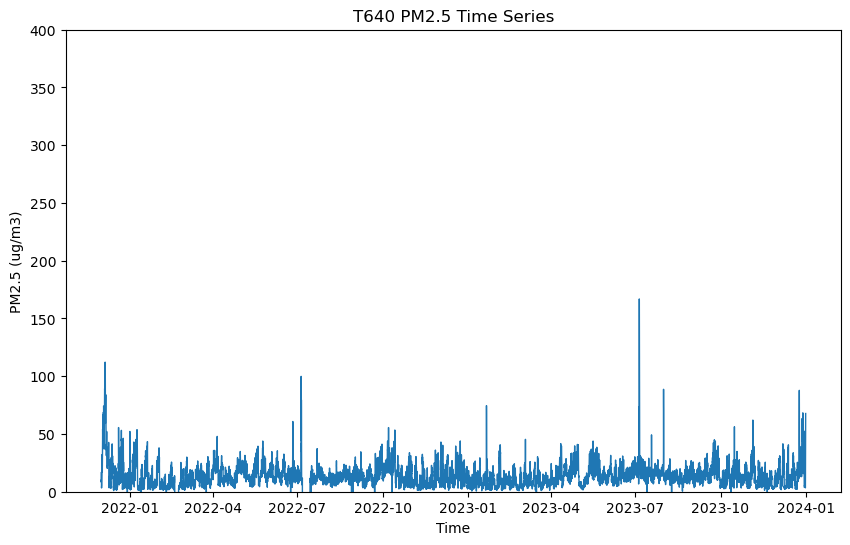

In [7]:
# Plot the GRIMM timeseries
plt.figure(figsize=(10, 6))
plt.plot(T640['Date (LST)'], T640['Value'],lw=1)
plt.title('T640 PM2.5 Time Series')
plt.xlabel('Time')
plt.ylabel('PM2.5 (ug/m3)')
plt.ylim(0, 400)
#plt.grid(True)
#plt.tight_layout()
#plt.autofmt_xdate()
plt.show()

In [8]:
#Drop NAs
T640=T640.dropna()
T640 = T640.reset_index(drop=True) 
GRIMM=GRIMM.dropna()
GRIMM = GRIMM.reset_index(drop=True)

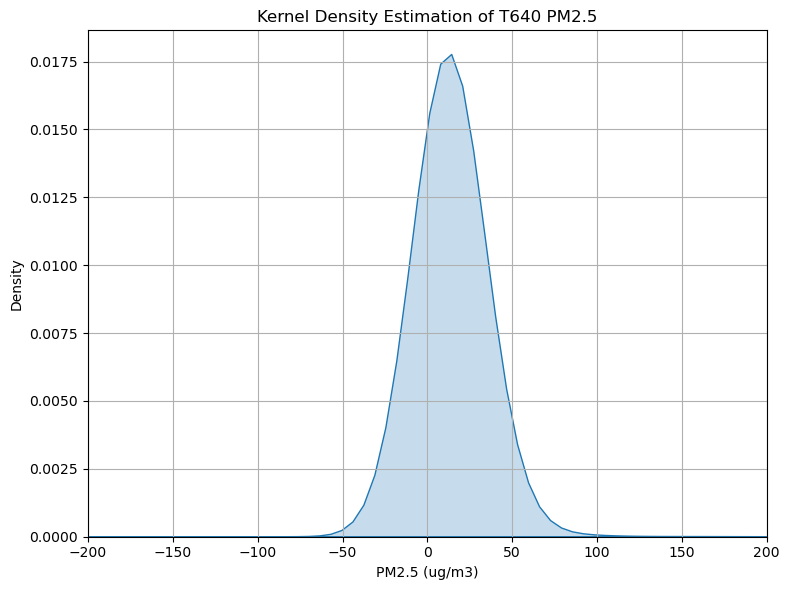

In [9]:
#Examine T640 Data
plt.figure(figsize=(8, 6))
sns.kdeplot(T640['Value'], fill=True)
plt.title('Kernel Density Estimation of T640 PM2.5')
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('Density')
plt.xlim(-200,200)
plt.grid(True)
plt.tight_layout()
plt.show()

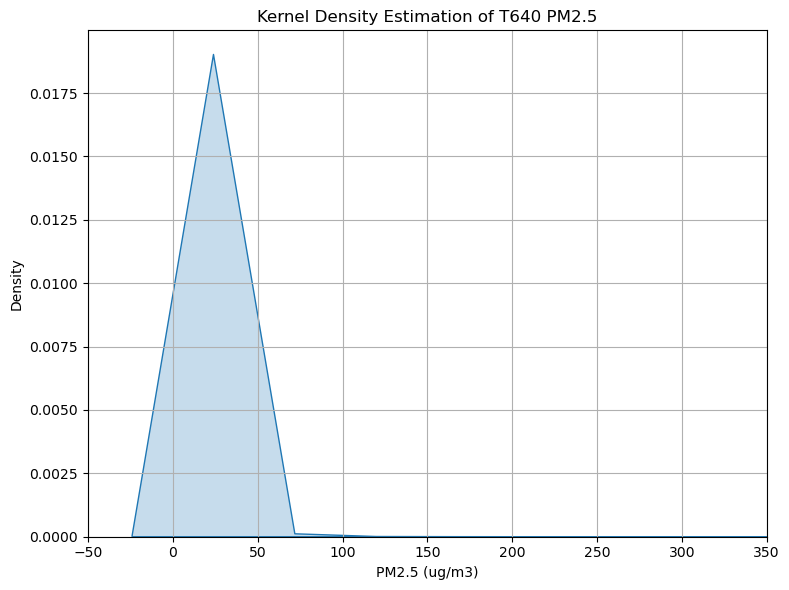

In [10]:
#Examine GRIMM Data
plt.figure(figsize=(8, 6))
sns.kdeplot(GRIMM['PM2.5 (ug/m3)'], fill=True)
plt.title('Kernel Density Estimation of T640 PM2.5')
plt.xlabel('PM2.5 (ug/m3)')
plt.ylabel('Density')
plt.grid(True)
plt.xlim(-50,350)
plt.tight_layout()
plt.show()

In [11]:
#Correlation between T640 and GRIMM
T640['Time'] = T640['Date (LST)']
merged_df = pd.merge(GRIMM, T640, on='Time', how='inner')

#Change column names
merged_df['GRIMM PM2.5']=merged_df['PM2.5 (ug/m3)']
merged_df['T640 PM2.5']=merged_df['Value']

#drop extraneous columns
merged_df = merged_df[['Time','GRIMM PM2.5','T640 PM2.5']]

#drop negative values and outliers
merged_df = merged_df[merged_df['T640 PM2.5'] >= 0]
merged_df = merged_df[merged_df['GRIMM PM2.5'] >= 0]

merged_df = merged_df[merged_df['T640 PM2.5'] <= 350]
merged_df = merged_df[merged_df['GRIMM PM2.5'] <= 350]

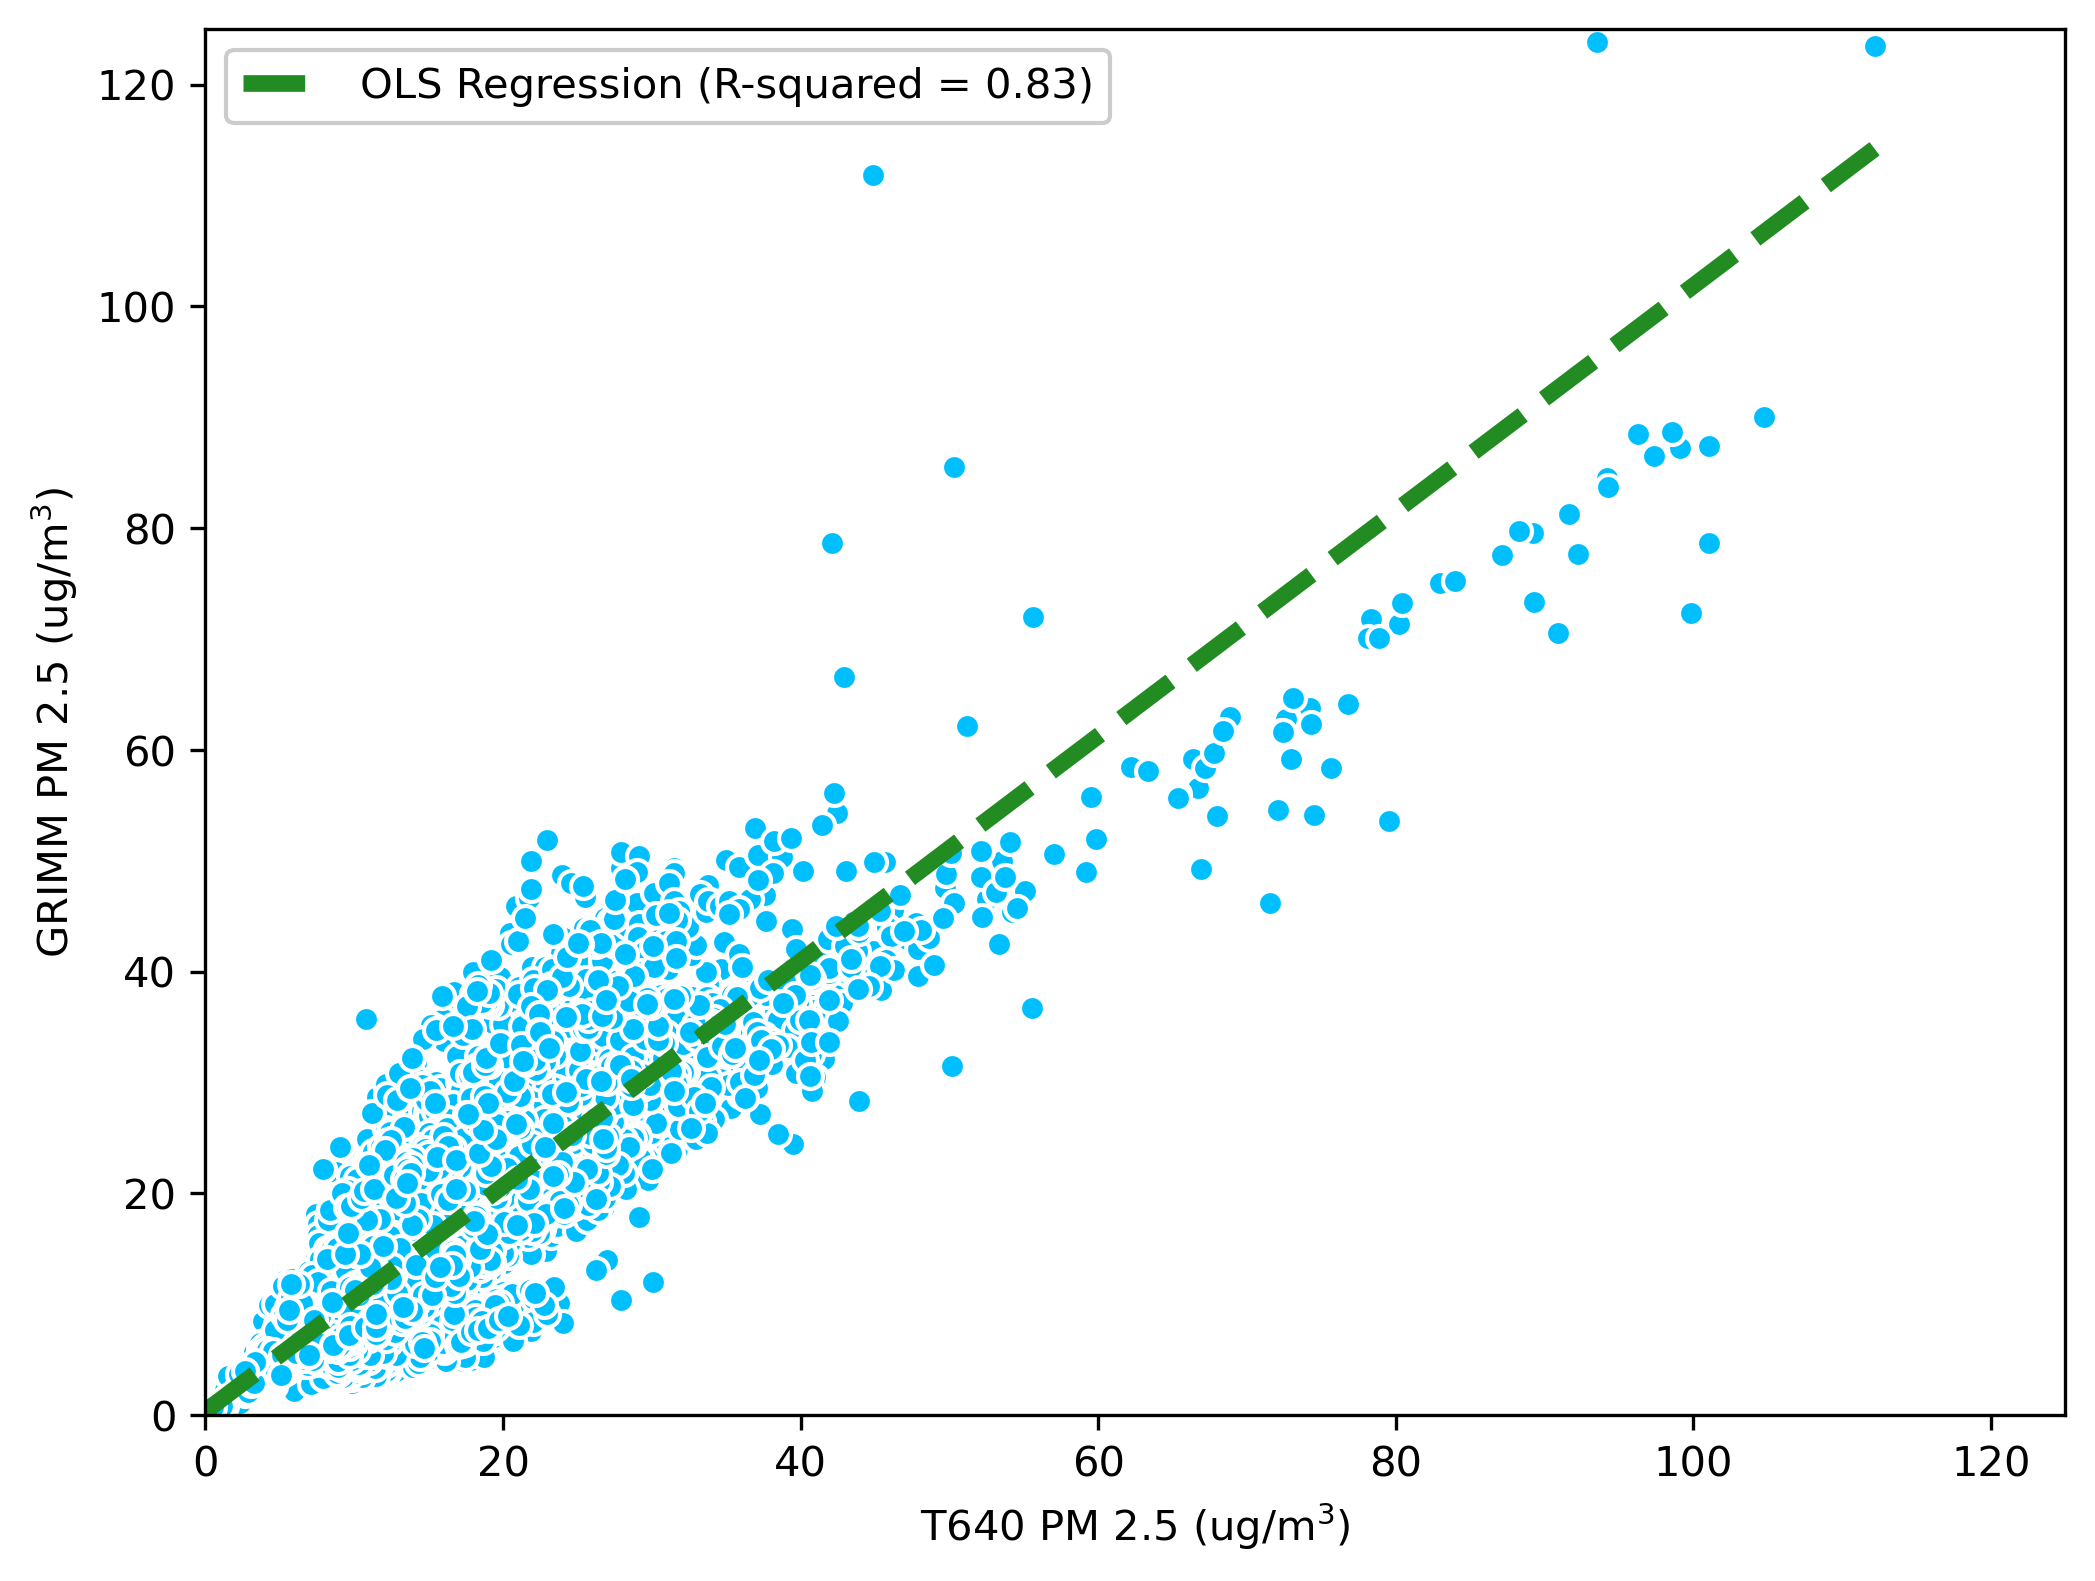

In [12]:
# Correlation of GRIMM and T640 ignoring negative values
y = merged_df['GRIMM PM2.5']
x = merged_df['T640 PM2.5']

#OLS
ols_mdl = sm.OLS(y, sm.add_constant(x)).fit()

# Calculate R-squared
r_squared = ols_mdl.rsquared

# Plot OLS vs RMA regression 
plt.figure(figsize=(8, 6), dpi=300)
plt.scatter(x, y, c='deepskyblue', edgecolors='white')
olsx = [0, max(x)]
olsy = [ols_mdl.params.iloc[0], ols_mdl.params.iloc[0] + (ols_mdl.params.iloc[1] * max(x))]
plt.plot(olsx, olsy, 'forestgreen', linestyle="--", linewidth=4, label=f'OLS Regression (R-squared = {r_squared:.2f})')
plt.xlabel('T640 PM 2.5 (ug/m$^\mathrm{3}$)')
plt.ylabel('GRIMM PM 2.5 (ug/m$^\mathrm{3}$)')
plt.xlim([0, 125])
plt.ylim([0, 125])
plt.legend(fontsize=10, loc="upper left", facecolor='white', framealpha=1)
plt.savefig('GRIMM_v_T640.png', dpi=300)

plt.show()

In [13]:
r_squared

0.8316765109671123

In [14]:
ols_mdl.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x14fe97790>>

In [15]:
ols_mdl